# Applied Data Science Capstone Project  
## Analysis of Vancouver BC, Canada
### Dino Rossi - November 2020

![Image of Vancouver](https://maps-vancouver.com/img/ban.jpg)Image source: https://maps-vancouver.com/img/ban.jpg

## 1. Introduction / Buisness Problem 
Vancouver is a densly populated city in the province of British Columbia on the Pacific coast of Canada. With a population of 675,000 in the city and 2,500,000 in the metropolitan area, it is the largest city in British Columbia and the thrid largest metropolitan area in Canada.  

While dense metropolitan areas bring opportunities, they also create constraints. These constraints can lead to stiff competition and high rents for prime business locations. Because of this, choosing the right location for a new business can make the difference between success and failure. The "right" location will mean different things to different people. Some might want to search out a "low" competition neighborhood where there are few restaurants, while others would prefer a "high" competition neighborhood in order to be situted within a bustling scene.

There is no substitute for local knowledge and understanding of a city and its neighborhoods, but there are often larger trends/patterns that are difficult to see. This projects sets out to take advantage of powerful data science tools and techniques in order to gain new insights into the city of Vancouver in order to understand some of those paterns and trends that are not necessarily visible or obvious. These insights will facilitate determining the best location to open a new restaurant by adding layers of information thay will be complementary to local knowledge. The results will be usuable by nayone looking to open a restaurant in Vancouver, and can be adapted to various use cases. 

<img src="https://www.cas-satj.gc.ca/images/canada-map.png" width="500px">

Image source: https://www.cas-satj.gc.ca/images/canada-map.png

## 2. Data Aquisition and Handling
A *dataset* will be built through the use of *web scraping* and pulling venue data through the *Foursquare API*. The data will be *wrangled* into shape using the *Pandas* library. Analysis of the data will be carried outwith the *Scikit-learn* library, in particular *K-means clustering* will be used. Finally, the results will be displayed as *maps* of the city, which will be produced using the *Folium* library. These maps can be used to narrow down potential locations for a new restaurant.

### 2.1 Building the Dataset...  
In order to build the data set it is necessary to aquire the postal codes for Vancouver. Canada uses an Alphanumeric postal code system. The country is broadly devided into 18 postal regions (see image). These regions are then further subdevided into smaller zones. British Columbia ("V" on the map) has 192 postal codes, but this project will only be looking at the postal codes in and immedialy around the city of Vancouver.  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Canadian_postal_district_map.svg/1024px-Canadian_postal_district_map.svg.png" width="400">
Image source: https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Canadian_postal_district_map.svg/1024px-Canadian_postal_district_map.svg.png  
  
Zooming in on Vancouver enables us to select the appropriate postal codes for the areas we wish to analyze. By studying the map below, we can see that the postal codes of interest include the ones starting with V5, V6, and V7. According to this site (https://worldpostalcode.com/canada/british-columbia/vancouver) Vancouver city includes these postal codes: V6L V5R V6H V6G V6E V6C V6B V6A V5Z V5Y V5X V5W V6K V5T V5S V5P V6M V5N V5M V5L V5V V7Y V7X V6Z V6T V6S V6R V6P V6N V5K V6J  
<img src="https://maps-vancouver.com/img/0/vancouver-postal-code-map.jpg" width="400">
Image source: https://maps-vancouver.com/img/0/vancouver-postal-code-map.jpg  

The rough data for the postal codes can be scraped from this Wikipedia page: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V The data includes all 192 postal codes for the British Columbia region, so the data set will nedd to be narrowed down to include only the appropriate codes.  

Once a clean dataframe of postal codes and nieghborhoods is created, webscrapping can again be employed, this time to aquire the geolocations (longitude and latitude) for each postal code.  

After the geolocations have been added to the dataframe API calls can be made to Frousquare to aquire venue data, which in turn will be appended to the dataframe.  

When the dataframe contains all the necessary/relevant data analysis/exploration can begin.

## 3. Code  
This section will show the code used to get, clean, and analyze the data, as well as generate the maps.

In [13]:
#Install Pandas and read data frames from Wikipedia page
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V'
dfs = pd.read_html(url)
print(len(dfs))

5


In [14]:
# create dataframe from correct table and display it
df1 = dfs[0]
df1.head()

,0,1,2,3,4,5,6,7,8
0,V1AKimberley,V2APenticton,V3ALangley Township(Langley City),V4ASurreySouthwest,V5ABurnaby(Government Road / Lake City / SFU /...,V6AVancouver(Strathcona / Chinatown / Downtown...,V7ARichmondSouth,V8APowell River,V9AVictoria(Vic West / Esquimalt)Canadian Forc...
1,V1BVernonEast,V2BKamloopsNorthwest,V3BPort CoquitlamCentral,V4BWhite Rock,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott),V6BVancouver(NE Downtown / Gastown / Harbour C...,V7BRichmond(Sea Island / YVR),V8BSquamish,V9BVictoria(West Highlands / North Langford / ...
2,V1CCranbrook,V2CKamloopsCentral and Southeast,V3CPort CoquitlamSouth,V4CDeltaNortheast,V5CBurnaby(Burnaby Heights / Willingdon Height...,V6CVancouver(Waterfront / Coal Harbour / Canad...,V7CRichmondNorthwest,V8CKitimat,V9CVictoria(Colwood / South Langford / Metchosin)
3,V1ESalmon Arm,V2EKamloopsSouth and West,V3ECoquitlamNorth,V4EDeltaEast,V5EBurnaby(Lakeview-Mayfield / Richmond Park /...,V6EVancouver(SE West End / Davie Village),V7ERichmondSouthwest,V8EWhistler,V9EVictoria(East Highlands / NW Saanich)
4,V1GDawson Creek,V2GWilliams Lake,V3GAbbotsfordEast,V4GDeltaEast Central,V5GBurnaby(Cascade-Schou / Douglas-Gilpin),V6GVancouver(NW West End / Stanley Park),V7GNorth Vancouver (district municipality)Oute...,V8GTerrace,V9GLadysmith


In [15]:
# sort all the names into a single column
import itertools as it
df2 = pd.DataFrame(sorted(it.chain(*df1.values)))
print(df2.shape)
df2.head()

(180, 1)


,0
0,V1AKimberley
1,V1BVernonEast
2,V1CCranbrook
3,V1ESalmon Arm
4,V1GDawson Creek


In [16]:
# rename postal code column to "post_code"
df3 = df2.rename(columns={0: 'post_code'})
df3

,post_code
0,V1AKimberley
1,V1BVernonEast
2,V1CCranbrook
3,V1ESalmon Arm
4,V1GDawson Creek
...,...
175,V9VNanaimoNorthwest
176,V9WCampbell RiverCentral
177,V9XNanaimo(Cedar)
178,V9YPort Alberni


In [17]:
# split post codes and neighborhood names into separate columns
df3['neighborhood'] = df3['post_code'].str.slice(start=3)
df3['post_code'] = df3['post_code'].str.slice(stop=3)
df3

,post_code,neighborhood
0,V1A,Kimberley
1,V1B,VernonEast
2,V1C,Cranbrook
3,V1E,Salmon Arm
4,V1G,Dawson Creek
...,...,...
175,V9V,NanaimoNorthwest
176,V9W,Campbell RiverCentral
177,V9X,Nanaimo(Cedar)
178,V9Y,Port Alberni


### Select Vacouver city post codes 
Vancouver city post codes include:
V6L V5R V6H V6G V6E V6C V6B V6A V5Z V5Y V5X V5W V6K V5T V5S V5P V6M V5N V5M V5L V5V V7Y V7X V6Z V6T V6S V6R V6P V6N V5K V6J  
These need to be selected out of the data frame which currently includes all post codes for the Province of British Columbia

In [18]:
# create series of post codes in Vancouver city 
vancouver_city = 'V6L V5R V6H V6G V6E V6C V6B V6A V5Z V5Y V5X V5W V6K V5T V5S V5P V6M V5N V5M V5L V5V V7Y V7X V6Z V6T V6S V6R V6P V6N V5K V6J'.split()
vancouver_city

df4 = df3[df3['post_code'].isin(vancouver_city)]
df4.head()

,post_code,neighborhood
87,V5K,Vancouver(North Hastings-Sunrise)
88,V5L,Vancouver(North Grandview-Woodland)
89,V5M,Vancouver(South Hastings-Sunrise / North Renfr...
90,V5N,Vancouver(South Grandview-Woodland / NE Kensin...
91,V5P,Vancouver(SE Kensington-Cedar Cottage / Victor...


In [19]:
# drop "Vancouver(" from start and  ")" from end of string, leaving only the neighborhood(s)
df5 = df4.copy()
df5['neighborhood'] = df5['neighborhood'].str.slice(start = 10, stop = -1)
df5.head()

,post_code,neighborhood
87,V5K,North Hastings-Sunrise
88,V5L,North Grandview-Woodland
89,V5M,South Hastings-Sunrise / North Renfrew-Colling...
90,V5N,South Grandview-Woodland / NE Kensington-Cedar...
91,V5P,SE Kensington-Cedar Cottage / Victoria-Fraserview


### scrape the geo locations (longitude and latitude) for each post code and append "long" and "lat" columns 

In [20]:
import requests

In [21]:
# a single post code test
resp = requests.get('http://geogratis.gc.ca/services/geolocation/en/locate?q=V5K')
df_test = pd.json_normalize(resp.json())
print('V5K latitude = ' + str(df_test['geometry.coordinates'][0][1]))
print('V5K longitude = ' + str(df_test['geometry.coordinates'][0][0]))

V5K latitude = 49.283199
V5K longitude = -123.038055


In [22]:
# loop through postcodes and scrape/append latitude and longitude columns  
lat = []
long = []
url_base = "http://geogratis.gc.ca/services/geolocation/en/locate?q="

for postal_code in df5["post_code"]:
        url = url_base + postal_code
        resp = requests.get(url)
        df = pd.json_normalize(resp.json())
        lat.append(df['geometry.coordinates'][0][1])
        long.append(df['geometry.coordinates'][0][0])

df5['latitude'] = lat
df5['longitude'] = long
df5.head()

,post_code,neighborhood,latitude,longitude
87,V5K,North Hastings-Sunrise,49.283199,-123.038055
88,V5L,North Grandview-Woodland,49.282318,-123.065453
89,V5M,South Hastings-Sunrise / North Renfrew-Colling...,49.261265,-123.038399
90,V5N,South Grandview-Woodland / NE Kensington-Cedar...,49.256790,-123.069305
91,V5P,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.224976,-123.066719


In [23]:
df6 = df5.reset_index()

In [24]:
df6 = df6.drop('index', 1)
df6

,post_code,neighborhood,latitude,longitude
0,V5K,North Hastings-Sunrise,49.283199,-123.038055
1,V5L,North Grandview-Woodland,49.282318,-123.065453
2,V5M,South Hastings-Sunrise / North Renfrew-Colling...,49.261265,-123.038399
3,V5N,South Grandview-Woodland / NE Kensington-Cedar...,49.256790,-123.069305
4,V5P,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.224976,-123.066719
5,V5R,South Renfrew-Collingwood,49.241203,-123.039391
6,V5S,Killarney,49.216930,-123.039429
7,V5T,East Mount Pleasant,49.260994,-123.090218
8,V5V,West Kensington-Cedar Cottage / NE Riley Park-...,49.249641,-123.089386
9,V5W,SE Riley Park-Little Mountain / SW Kensington-...,49.233925,-123.090279


In [230]:
# drop postal codes V7X and V7Y
# they are only postal sorting centers
df7 = df6.drop(index=[29, 30])
df7

,post_code,neighborhood,latitude,longitude
0,V5K,North Hastings-Sunrise,49.283199,-123.038055
1,V5L,North Grandview-Woodland,49.282318,-123.065453
2,V5M,South Hastings-Sunrise / North Renfrew-Colling...,49.261265,-123.038399
3,V5N,South Grandview-Woodland / NE Kensington-Cedar...,49.256790,-123.069305
4,V5P,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.224976,-123.066719
5,V5R,South Renfrew-Collingwood,49.241203,-123.039391
6,V5S,Killarney,49.216930,-123.039429
7,V5T,East Mount Pleasant,49.260994,-123.090218
8,V5V,West Kensington-Cedar Cottage / NE Riley Park-...,49.249641,-123.089386
9,V5W,SE Riley Park-Little Mountain / SW Kensington-...,49.233925,-123.090279


In [25]:
# install the Folium mapping library
!pip install folium

     |████████████████████████████████| 93 kB 3.5 MB/s  eta 0:00:01


In [26]:
# import necessary dependancies
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Get the goelocation of Vancouver

In [27]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="vancouver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Vancouver are 49.2608724, -123.1139529.


### Render map of Vancouver with popup labels for each neighborhood

In [231]:
map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, post_code, neighborhood in zip(df7['latitude'], df7['longitude'], df7['post_code'], df7['neighborhood']):
    label = '{}, {}'.format(post_code, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

### Define Foursquare credentials

In [232]:
CLIENT_ID = 'RQTKAI02GUBBWOALYFA1TORTVFRDYV1T0OKJ2YURACV5UY53' # your Foursquare ID
CLIENT_SECRET = 'OZELN5WGNRZEVT1V3N4PPQDFEVKHRQAGYA0ZUIPQ20YS2QES' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RQTKAI02GUBBWOALYFA1TORTVFRDYV1T0OKJ2YURACV5UY53
CLIENT_SECRET:OZELN5WGNRZEVT1V3N4PPQDFEVKHRQAGYA0ZUIPQ20YS2QES


### Explore a single neighbourhood

In [245]:
df7.loc[0, 'neighborhood']

'North Hastings-Sunrise'

In [246]:
neighborhood_latitude = df7.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df7.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df7.loc[0, 'neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of North Hastings-Sunrise are 49.283199, -123.038055.


In [247]:
# set up Foursquare API call
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# display URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RQTKAI02GUBBWOALYFA1TORTVFRDYV1T0OKJ2YURACV5UY53&client_secret=OZELN5WGNRZEVT1V3N4PPQDFEVKHRQAGYA0ZUIPQ20YS2QES&v=20180605&ll=49.283199,-123.038055&radius=500&limit=100'

In [248]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc3a088db10fc595b5bc79b'},
 'response': {'headerLocation': 'Hastings-Sunrise',
  'headerFullLocation': 'Hastings-Sunrise, Vancouver',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 22,
  'suggestedBounds': {'ne': {'lat': 49.287699004500006,
    'lng': -123.03116942580975},
   'sw': {'lat': 49.2786989955, 'lng': -123.04494057419025}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aa7d27bf964a520644d20e3',
       'name': 'The Fair at the PNE',
       'location': {'address': '2901 East Hastings St',
        'crossStreet': 'at Renfrew St',
        'lat': 49.28297109526185,
        'lng': -123.04210889782496,
        'labeledLatLngs': [{'label': 'display',
          'lat': 49.28297109526185,
          'lng': -123.0421

In [249]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Create data frame of nearby venues based on neighborhood

In [250]:
venues = results['response']['groups'][0]['items']
   
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,The Fair at the PNE,Fair,49.282971,-123.042109
1,Wooden Roller Coaster,Theme Park Ride / Attraction,49.281744,-123.035128
2,Livestock Barns,Farm,49.284037,-123.039278
3,Playland,Theme Park,49.281924,-123.036258
4,Pacific Coliseum,Hockey Arena,49.285823,-123.042727
5,PNE Amphitheatre,Amphitheater,49.283777,-123.037242
6,Plaza Beer Garden,Beer Garden,49.283701,-123.038785
7,Empire Fields,Soccer Field,49.281870,-123.034135
8,Hastings Community Centre,Event Space,49.280778,-123.039176
9,PNE Forum,Event Space,49.282174,-123.043021


In [251]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

22 venues were returned by Foursquare.


### Exploring multiple neighbourhoods in Vancouver

In [252]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighborhood', 
                  'neighborhood_latitude', 
                  'neighborhood_longitude', 
                  'venue', 
                  'venue_latitude', 
                  'venue_longitude', 
                  'venue_category']
    
    return(nearby_venues)

In [253]:
# if this cell fails with ~ KeyError 'Groups'
# create client secret on foursquare site and replace it in code above
vancouver_venues = getNearbyVenues(names=df7['neighborhood'],
                                   latitudes=df7['latitude'],
                                   longitudes=df7['longitude']
                                  )

North Hastings-Sunrise
North Grandview-Woodland
South Hastings-Sunrise / North Renfrew-Collingwood
South Grandview-Woodland / NE Kensington-Cedar Cottage
SE Kensington-Cedar Cottage / Victoria-Fraserview
South Renfrew-Collingwood
Killarney
East Mount Pleasant
West Kensington-Cedar Cottage / NE Riley Park-Little Mountain
SE Riley Park-Little Mountain / SW Kensington-Cedar Cottage / NE Oakridge / North Sunset
SE Oakridge / East Marpole / South Sunset
West Mount Pleasant / West Riley Park-Little Mountain
East Fairview / South Cambie
Strathcona / Chinatown / Downtown Eastside
NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown
Waterfront / Coal Harbour / Canada Place
SE West End / Davie Village
NW West End / Stanley Park
West Fairview / Granville Island / NE Shaughnessy
NW Shaughnessy / East Kitsilano / Quilchena
Central Kitsilano / Greektown
NW Arbutus Ridge / NE Dunbar-Southlands
South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge
Wes

In [254]:
print(vancouver_venues.shape)
vancouver_venues.head()

(814, 7)


,neighborhood,neighborhood_latitude,neighborhood_longitude,venue,venue_latitude,venue_longitude,venue_category
0,North Hastings-Sunrise,49.283199,-123.038055,The Fair at the PNE,49.282971,-123.042109,Fair
1,North Hastings-Sunrise,49.283199,-123.038055,Wooden Roller Coaster,49.281744,-123.035128,Theme Park Ride / Attraction
2,North Hastings-Sunrise,49.283199,-123.038055,Livestock Barns,49.284037,-123.039278,Farm
3,North Hastings-Sunrise,49.283199,-123.038055,Playland,49.281924,-123.036258,Theme Park
4,North Hastings-Sunrise,49.283199,-123.038055,Pacific Coliseum,49.285823,-123.042727,Hockey Arena


In [255]:
vancouver_venues.groupby('neighborhood').count()

,neighborhood_latitude,neighborhood_longitude,venue,venue_latitude,venue_longitude,venue_category
neighborhood,,,,,,
Central Kitsilano / Greektown,51,51,51,51,51,51
East Fairview / South Cambie,17,17,17,17,17,17
East Mount Pleasant,26,26,26,26,26,26
Killarney,17,17,17,17,17,17
NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown,45,45,45,45,45,45
NW Arbutus Ridge / NE Dunbar-Southlands,4,4,4,4,4,4
NW Dunbar-Southlands / Chaldecutt / South University Endowment Lands,3,3,3,3,3,3
NW Shaughnessy / East Kitsilano / Quilchena,51,51,51,51,51,51
NW West End / Stanley Park,17,17,17,17,17,17


## Total # of unique venues

In [256]:
# find number of unique venues
print('There are {} uniques categories.'.format(len(vancouver_venues['venue_category'].unique())))

There are 180 uniques categories.


## =======================================================================

## Total # of venues per neighborhood

In [258]:
df7

,post_code,neighborhood,latitude,longitude
0,V5K,North Hastings-Sunrise,49.283199,-123.038055
1,V5L,North Grandview-Woodland,49.282318,-123.065453
2,V5M,South Hastings-Sunrise / North Renfrew-Colling...,49.261265,-123.038399
3,V5N,South Grandview-Woodland / NE Kensington-Cedar...,49.256790,-123.069305
4,V5P,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.224976,-123.066719
5,V5R,South Renfrew-Collingwood,49.241203,-123.039391
6,V5S,Killarney,49.216930,-123.039429
7,V5T,East Mount Pleasant,49.260994,-123.090218
8,V5V,West Kensington-Cedar Cottage / NE Riley Park-...,49.249641,-123.089386
9,V5W,SE Riley Park-Little Mountain / SW Kensington-...,49.233925,-123.090279


In [271]:
# group by neighborhood, sum venue count/neighborhood, sort by total venues
df_venue_grouped = vancouver_venues.groupby(['neighborhood'], as_index=False)['venue'].count()
df_venue_grouped_1 = df_venue_grouped.rename(columns = {'venue': 'total_venues'}, inplace = False)
df_venue_grouped_2 = df_venue_grouped_1.sort_values('total_venues').tail(15)
df_venue_grouped_2.reset_index(drop=True, inplace=True)
df_venue_grouped_3 = df_venue_grouped_2.sort_values('total_venues', ascending=False)
df_venue_grouped_3.reset_index(drop=True, inplace=True)
df_venue_grouped_3

,neighborhood,total_venues
0,SE West End / Davie Village,100
1,SW Downtown,99
2,Waterfront / Coal Harbour / Canada Place,99
3,NW Shaughnessy / East Kitsilano / Quilchena,51
4,Central Kitsilano / Greektown,51
5,NE Downtown / Gastown / Harbour Centre / Inter...,45
6,North Grandview-Woodland,41
7,West Fairview / Granville Island / NE Shaughnessy,34
8,South Grandview-Woodland / NE Kensington-Cedar...,27
9,UBC,27


In [272]:
# add postal code column
df_venue_grouped_3.insert(0, "postal_code", ['V6E', 'V6Z', 'V6C', 'V6J', 'V6K', 'V6B', 'V5L', 'V6H', 'V5N', 'V6T', 'V5V', 'V5T', 'V5K', 'V5W', 'V6P'], True)
df_venue_grouped_3

,postal_code,neighborhood,total_venues
0,V6E,SE West End / Davie Village,100
1,V6Z,SW Downtown,99
2,V6C,Waterfront / Coal Harbour / Canada Place,99
3,V6J,NW Shaughnessy / East Kitsilano / Quilchena,51
4,V6K,Central Kitsilano / Greektown,51
5,V6B,NE Downtown / Gastown / Harbour Centre / Inter...,45
6,V5L,North Grandview-Woodland,41
7,V6H,West Fairview / Granville Island / NE Shaughnessy,34
8,V5N,South Grandview-Woodland / NE Kensington-Cedar...,27
9,V6T,UBC,27


In [273]:
df_venue_grouped_3.reset_index(drop=True, inplace=True)
df_venue_grouped_3

,postal_code,neighborhood,total_venues
0,V6E,SE West End / Davie Village,100
1,V6Z,SW Downtown,99
2,V6C,Waterfront / Coal Harbour / Canada Place,99
3,V6J,NW Shaughnessy / East Kitsilano / Quilchena,51
4,V6K,Central Kitsilano / Greektown,51
5,V6B,NE Downtown / Gastown / Harbour Centre / Inter...,45
6,V5L,North Grandview-Woodland,41
7,V6H,West Fairview / Granville Island / NE Shaughnessy,34
8,V5N,South Grandview-Woodland / NE Kensington-Cedar...,27
9,V6T,UBC,27


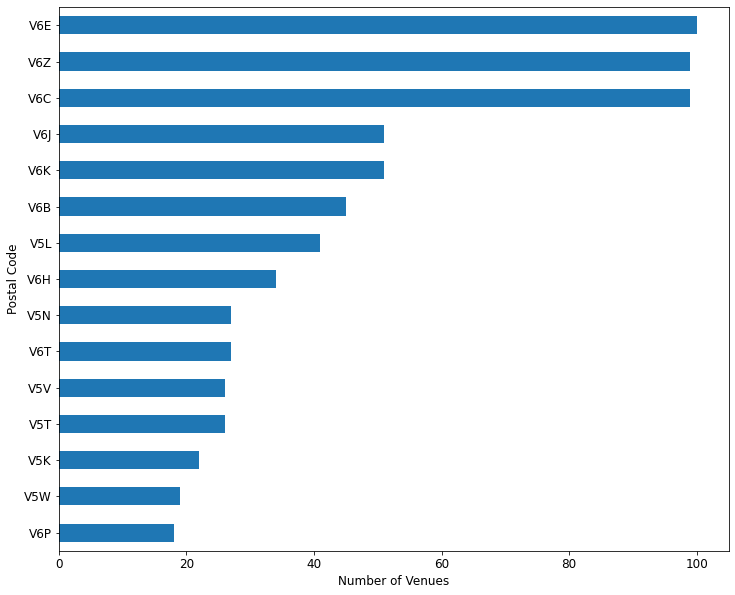

In [275]:
import matplotlib.pyplot as plt
ax = df_venue_grouped_3.plot.barh(x='postal_code', y='total_venues', figsize=(12,10), legend=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of Venues', fontsize=12)
plt.ylabel('Postal Code', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

## =======================================================================

## Population and Population Density per neighborhood

### Scrape population and density statistics for a single post code

In [163]:
# check webpage for required data
url = 'https://postal-codes.cybo.com/canada/V6T_vancouver/'
dfs = pd.read_html(url)
#number of datframes on page
print(len(dfs))
# select desired dataframe
df_pop_and_dense = dfs[1]
df_pop_and_dense

12


,Data,1975,1990,2000,2015
0,Population,6336,8590,10276,13277
1,Population Density,906.0 / km²,"1,228 / km²","1,469 / km²","1,898 / km²"


In [164]:
# population
print('population = ' + df_pop_and_dense['2015'][0])
print('population density = ' + df_pop_and_dense['2015'][1])

population = 13277
population density = 1,898 / km²


In [165]:
# put most recent population and poopulation density into separate columns
df_pop_and_dense['population'] = df_pop_and_dense['2015'][0]
df_pop_and_dense['pop_density'] = df_pop_and_dense['2015'][1]

# drop unnecessary columns
df_pop_and_dense.drop(['Data', '1975', '1990', '2000', '2015'], axis=1, inplace=True)
df_pop_and_dense.drop([1], axis=0, inplace=True)

# drop ' / km2' from density column data
df_pop_and_dense['pop_density'] = df_pop_and_dense['pop_density'].str.slice(stop=-5)

df_pop_and_dense

,population,pop_density
0,13277,"1,898"


### Scrape population and density statistics for a multiple post codes

In [166]:
# create series of post codes in vancouver
vancouver_city_0 = 'V6L V5R V6H V6G V6E V6C V6B V6A V5Z V5Y V5X V5W V6K V5T V5S V5P V6M V5N V5M V5L V5V V6Z V6T V6S V6R V6P V6N V5K V6J'.split()
#vancouver_city_1 = 'V6L V5R V6H V6G V6E V6C V6B V6A V5Z V5Y V5X V5W V6K V5T'.split()
#vancouver_city_2 = 'V5S V5P V6M V5N V5M V5L V5V V7Y V7X V6Z V6T V6S V6R V6P V6N V5K V6J'.split()

In [170]:
# loop through postcodes and scrape/append latitude and longitude columns
# data for V7Y and V7X not availabel on webpage
# they appear to be postal sorting facilities, as opposed to neighborhoods with population counts
# either assign them to "None" or leave them out of the list

df_pop_and_dense_multi = pd.DataFrame()
post = []
pop = []
pop_density = []
url_base = "https://postal-codes.cybo.com/canada/"
url_end = "_vancouver/"
x = random.random()

for postal_code in vancouver_city_0:
    url = url_base + postal_code + url_end
    print(url)
    temp_read = pd.read_html(url)
    temp_df = temp_read[1]
    post.append(postal_code)
    pop.append(temp_df['2015'][0])
    pop_density.append(temp_df['2015'][1])

df_pop_and_dense_multi['post_code'] = post
df_pop_and_dense_multi['population'] = pop
df_pop_and_dense_multi['pop_density'] = pop_density
df_pop_and_dense_multi.head()

https://postal-codes.cybo.com/canada/V6L_vancouver/
https://postal-codes.cybo.com/canada/V5R_vancouver/
https://postal-codes.cybo.com/canada/V6H_vancouver/
https://postal-codes.cybo.com/canada/V6G_vancouver/
https://postal-codes.cybo.com/canada/V6E_vancouver/
https://postal-codes.cybo.com/canada/V6C_vancouver/
https://postal-codes.cybo.com/canada/V6B_vancouver/
https://postal-codes.cybo.com/canada/V6A_vancouver/
https://postal-codes.cybo.com/canada/V5Z_vancouver/
https://postal-codes.cybo.com/canada/V5Y_vancouver/
https://postal-codes.cybo.com/canada/V5X_vancouver/
https://postal-codes.cybo.com/canada/V5W_vancouver/
https://postal-codes.cybo.com/canada/V6K_vancouver/
https://postal-codes.cybo.com/canada/V5T_vancouver/
https://postal-codes.cybo.com/canada/V5S_vancouver/
https://postal-codes.cybo.com/canada/V5P_vancouver/
https://postal-codes.cybo.com/canada/V6M_vancouver/
https://postal-codes.cybo.com/canada/V5N_vancouver/
https://postal-codes.cybo.com/canada/V5M_vancouver/
https://post

,post_code,population,pop_density
0,V6L,14265,"3,930 / km²"
1,V5R,45955,"7,849 / km²"
2,V6H,19290,"7,119 / km²"
3,V6G,27851,"5,296 / km²"
4,V6E,26410,"21,213 / km²"


In [190]:
df_pop_and_dense_multi_2 = df_pop_and_dense_multi.copy()

In [191]:
# drop ' / km2' from density column data
df_pop_and_dense_multi_2['pop_density'] = df_pop_and_dense_multi_2['pop_density'].str.slice(stop=-5)
df_pop_and_dense_multi_2

,post_code,population,pop_density
0,V6L,14265,"3,930"
1,V5R,45955,"7,849"
2,V6H,19290,"7,119"
3,V6G,27851,"5,296"
4,V6E,26410,"21,213"
5,V6C,1517,"10,561"
6,V6B,30039,"12,594"
7,V6A,16294,"5,032"
8,V5Z,20910,"5,561"
9,V5Y,18819,"4,444"


In [183]:
df_pop_and_dense_multi_2.dtypes

post_code      object
population     object
pop_density    object
dtype: object

In [192]:
#strip commas from pop_density column
df_pop_and_dense_multi_2 = df_pop_and_dense_multi_2.apply(lambda pop_density: pop_density.str.replace(',', ''))
# cast 'population' and 'pop_density' coulmns as numeric
df_pop_and_dense_multi_2[['population', 'pop_density']] = df_pop_and_dense_multi_2[['population', 'pop_density']].apply(pd.to_numeric)
df_pop_and_dense_multi_2.dtypes

post_code      object
population      int64
pop_density     int64
dtype: object

In [205]:
# sort by population
df_pop_and_dense_multi_2_sort_pop = df_pop_and_dense_multi_2.sort_values('population', ascending=True).tail(15)
df_pop_and_dense_multi_2_sort_pop

,post_code,population,pop_density
8,V5Z,20910,5561
20,V5V,22280,5975
27,V5K,24030,4076
18,V5M,25017,5104
13,V5T,25375,8211
12,V6K,26288,8326
4,V6E,26410,21213
3,V6G,27851,5296
6,V6B,30039,12594
14,V5S,32823,4464


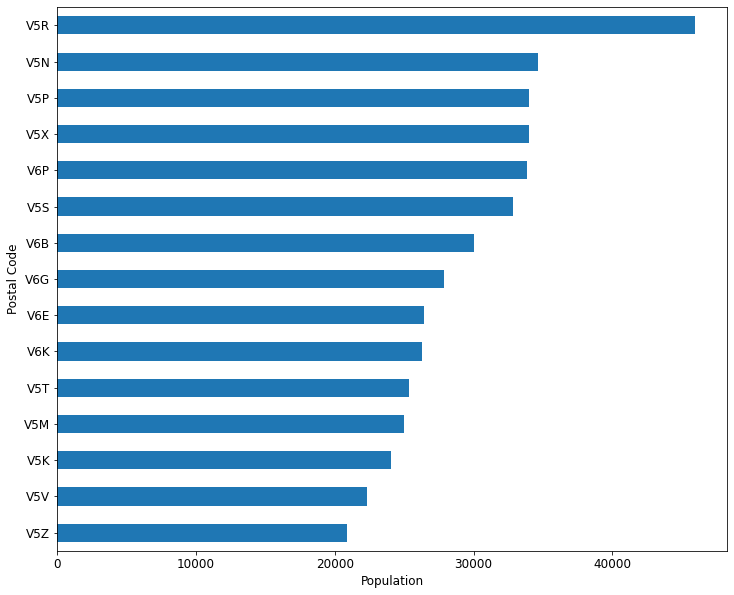

In [210]:
# plot postal code by population
ax = df_pop_and_dense_multi_2_sort_pop.plot.barh(x='post_code', y='population', figsize=(12,10), legend=False)
#ax = df_pop_and_dense_multi_2.plot.barh(x='neighborhood', y='total_venues', figsize=(12,10), legend=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Postal Code', fontsize=12)
plt.show()

In [217]:
# sort by density
df_pop_and_dense_multi_2_sort_dense = df_pop_and_dense_multi_2.sort_values('pop_density', ascending=True).tail(15)
df_pop_and_dense_multi_2_sort_dense.reset_index(inplace=True)
df_pop_and_dense_multi_2_sort_dense

,index,post_code,population,pop_density
0,19,V5L,18404,5281
1,3,V6G,27851,5296
2,8,V5Z,20910,5561
3,20,V5V,22280,5975
4,11,V5W,19808,6045
5,15,V5P,34003,6577
6,17,V5N,34638,6965
7,2,V6H,19290,7119
8,1,V5R,45955,7849
9,13,V5T,25375,8211


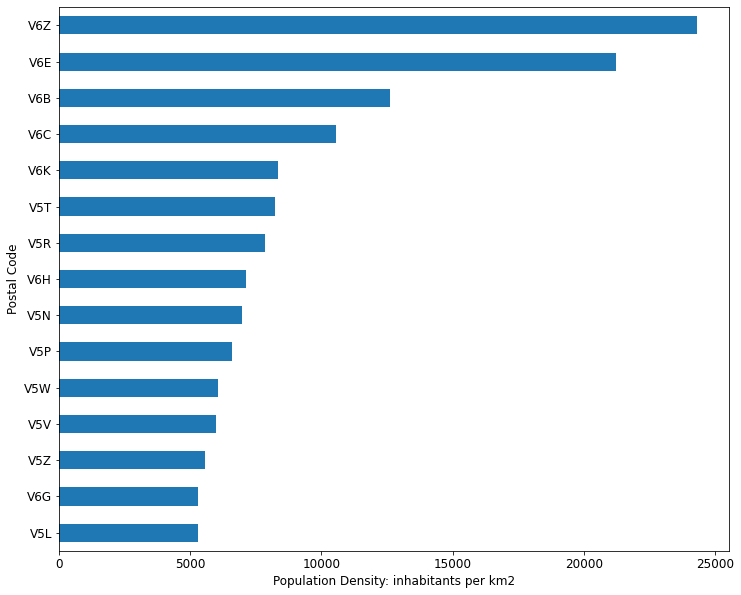

In [222]:
# plot postal code by population
ax = df_pop_and_dense_multi_2_sort_dense.plot.barh(x='post_code', y='pop_density', figsize=(12,10), legend=False)
#ax = df_pop_and_dense_multi_2.plot.barh(x='neighborhood', y='total_venues', figsize=(12,10), legend=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Population Density: inhabitants per km2', fontsize=12)
plt.ylabel('Postal Code', fontsize=12)
plt.show()

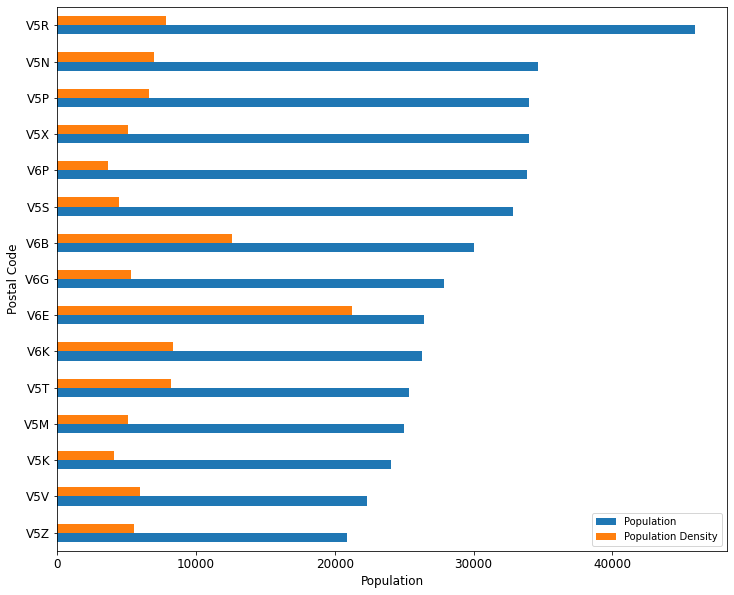

In [221]:
# plot population and density combined
ax = df_pop_and_dense_multi_2_sort_pop.plot.barh(x='post_code', figsize=(12,10))
#ax = df_pop_and_dense_multi_2.plot.barh(x='neighborhood', y='total_venues', figsize=(12,10), legend=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Postal Code', fontsize=12)
ax.legend(["Population", "Population Density"]);
plt.show()

## =======================================================================

## One hot encoding

In [49]:
# one hot encoding
vancouver_onehot = pd.get_dummies(vancouver_venues[['venue_category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vancouver_onehot['neighborhood'] = vancouver_venues['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]

vancouver_onehot.head()

,neighborhood,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Auto Workshop,Bakery,Bank,Bar,Beach,Beer Garden,Bike Shop,Bike Trail,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Child Care Service,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cruise Ship,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health Food Store,History Museum,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [50]:
vancouver_onehot.shape

(987, 182)

### Group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category

In [51]:
vancouver_grouped = vancouver_onehot.groupby('neighborhood').mean().reset_index()
vancouver_grouped

,neighborhood,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Auto Workshop,Bakery,Bank,Bar,Beach,Beer Garden,Bike Shop,Bike Trail,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Child Care Service,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cruise Ship,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health Food Store,History Museum,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Bentall Centre,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.012500,0.087500,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.025000,0.000000,0.050000,0.000000,0.000000,0.037500,0.000000,0.000000,0.000000,0.000000,0.037500,0.000000,0.000000,0.000000,0.025000,0.012500,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.012500,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112500,0.012500,0.000000,0.012500,0.000000,0.012500,0.000000,0.000000,0.025000,0.012500,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.012500,0.000000,0.012500,0.00,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.012500,0.00,0.0125,0.000000,0.000000,0.012500,0.000000,0.012500,0.000000,0.012500,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.012500,0.012500,0.025000,0.000000,0.00,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.0000

In [52]:
vancouver_grouped.shape

(31, 182)

In [53]:
num_top_venues = 5

for hood in vancouver_grouped['neighborhood']:
    print("----"+hood+"----")
    temp = vancouver_grouped[vancouver_grouped['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bentall Centre----
            venue  freq
0           Hotel  0.11
1            Café  0.09
2     Coffee Shop  0.05
3  Cosmetics Shop  0.04
4    Dessert Shop  0.04


----Central Kitsilano / Greektown----
                 venue  freq
0          Coffee Shop  0.10
1          Pizza Place  0.06
2          Yoga Studio  0.04
3                 Café  0.04
4  Japanese Restaurant  0.04


----East Fairview / South Cambie----
                venue  freq
0         Coffee Shop  0.12
1                Park  0.12
2  Chinese Restaurant  0.12
3                Bank  0.12
4     Bubble Tea Shop  0.12


----East Mount Pleasant----
                venue  freq
0              Bakery  0.12
1         Pizza Place  0.08
2  Mexican Restaurant  0.08
3    Sushi Restaurant  0.04
4           Pet Store  0.04


----Killarney----
                  venue  freq
0    Chinese Restaurant  0.12
1           Coffee Shop  0.06
2  Fast Food Restaurant  0.06
3         Grocery Store  0.06
4        Farmers Market  0.06


----NE Downt

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = vancouver_grouped['neighborhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bentall Centre,Hotel,Café,Coffee Shop,Cosmetics Shop,Dessert Shop,Clothing Store,American Restaurant,Plaza,Vietnamese Restaurant,Japanese Restaurant
1,Central Kitsilano / Greektown,Coffee Shop,Pizza Place,Yoga Studio,Japanese Restaurant,Bank,Bakery,Café,Chinese Restaurant,Burger Joint,Scenic Lookout
2,East Fairview / South Cambie,Park,Coffee Shop,Bubble Tea Shop,Bank,Chinese Restaurant,Bus Stop,Bakery,Dessert Shop,Sushi Restaurant,Light Rail Station
3,East Mount Pleasant,Bakery,Mexican Restaurant,Pizza Place,Coffee Shop,Farmers Market,Café,Sandwich Place,Caribbean Restaurant,Pub,Sports Bar
4,Killarney,Chinese Restaurant,Juice Bar,Fast Food Restaurant,Shopping Mall,Sandwich Place,Liquor Store,Salon / Barbershop,Sushi Restaurant,Farmers Market,Gas Station


### Cluster neighborhoods with K-means

In [56]:
# set number of clusters
kclusters = 5

vancouver_grouped_clustering = vancouver_grouped.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 4, 4, 0, 4, 0, 0, 1, 4, 0], dtype=int32)

In [57]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = df6

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')

vancouver_merged.head() # check the last columns!

,post_code,neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K,North Hastings-Sunrise,49.283199,-123.038055,0,Theme Park Ride / Attraction,Park,Theme Park,Event Space,Theater,Fair,Farm,Farmers Market,Bus Station,Market
1,V5L,North Grandview-Woodland,49.282318,-123.065453,4,Chinese Restaurant,Café,Bakery,Vietnamese Restaurant,Coffee Shop,Brewery,Bus Stop,Asian Restaurant,Convenience Store,Pizza Place
2,V5M,South Hastings-Sunrise / North Renfrew-Colling...,49.261265,-123.038399,4,Bus Stop,Pet Store,Office,Liquor Store,Storage Facility,Sushi Restaurant,Electronics Store,Metro Station,Clothing Store,Furniture / Home Store
3,V5N,South Grandview-Woodland / NE Kensington-Cedar...,49.256790,-123.069305,0,Café,Bakery,Chinese Restaurant,Park,Skating Rink,Pub,Child Care Service,Spa,Bookstore,Church
4,V5P,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.224976,-123.066719,4,Asian Restaurant,Noodle House,Sandwich Place,Sushi Restaurant,Gas Station,Bank,Bus Station,Thrift / Vintage Store,Restaurant,Pizza Place


In [58]:
# drops rows with NaNs
vancouver_merged = vancouver_merged.dropna()

### create a map of the clustered neighborhoods

In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['neighborhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

# Vancouver population

In [66]:
canada_pop = pd.read_csv('T120120201127110534.CSV', encoding = 'unicode_escape')
canada_pop.tail(100)

FileNotFoundError: [Errno 2] No such file or directory: 'T120120201127110534.CSV'